### structure de données
Pour repésenter les graphes on peut tuiliser:
- un dictionnaire contnant pour chque point(clé) les points qui sont accessibles,
- un liste qui conteint pour chaque arc du graphe un tubl (point de départ, point d'arrivé, distance)
- une matrice qui comporte pour chaque coefficient de coordonées (i,j) , Mij = la distance en suivant l'arc de i à j si il exitse, 0 sinon.
...


## Si on stock les arretes

In [1]:
# par exemple
graph_as_list = [
  ['a', 14, 'c'],
  ['a', 9, 'd'],
  ['a', 7, 'b'],
  ['a', 7, 'b'],
  ['b', 10, 'd'],
  ...
]

Cette représentation est adapté car il y a peu d'arcs par point: ~2/points alors qu'il y a 6 points.

## si on stock la matrice

In [2]:
# par exemple
import numpy as np
graph_as_matrix = (
    np.array([
        [0, 7,14, 9, 0, 0],
        [0, 0, 0,10,15, 0],
        [0, 0, 0, 2, 0, 9],
        [0, 0, 0, 0,11, 0],
        [0, 0, 0, 0, 0, 6],
        [0, 0, 0, 0, 0, 0]]),
    ['a', 'b', 'c', 'd', 'e', 'f'])

ModuleNotFoundError: No module named 'numpy'

Peu de coefficients non nuls et matrice triangulaire donc peut être très utile en terme de propriétés(convergence vers un point si on se force à se déplacer). 

## Autre idée


In [ ]:
my_graph_dict = { "a": [("c",14) ,("d",9), ("b",7)] , "b": [("d",10), ("e",15)], }


Mais n'est pas pratique ici car le dictionnaire est long à parcourir.

### EXO 1 
bojectif représenter le graphe présent au format csv dans un dictionanaire

In [7]:
import csv
def parse_graph(filename):
    G={}
    with open (filename , "r") as file:
        for ligne in file:
            ligne = ligne.rstrip().split(',')
            #print(ligne)
            ligne[2] = int(ligne[2])
            if ligne[0] in G:
                G[ligne[0]][ligne[1]] = ligne[2] 
            else :
                G[ligne[0]] = {ligne[1] : ligne[2]}
    return G


parse_graph("data/graph.csv")

{'a': {'b': 7, 'd': 9, 'c': 14},
 'b': {'d': 10, 'e': 15},
 'c': {'d': 2, 'f': 9},
 'd': {'e': 11},
 'e': {'f': 6}}

## Test

In [12]:
# ceci doit vous afficher un dictionnaire de dictionnaires

parse_graph("data/graph.csv")

# et ceci doit être True

G = {
    'a': {'b': 7, 'd': 9, 'c': 14},
    'b': {'d': 10, 'e': 15},
    'c': {'d': 2, 'f': 9},
    'd': {'e': 11},
    'e': {'f': 6}}

parse_graph("data/graph.csv") == G

# et ceci doit être True aussi

import json

with open("data/graph-2.json") as f:
    g2ref = json.load(f) 
g2ref == parse_graph("data/graph-2.csv")


# et ceci doit être True aussi

with open("data/graph-3.json") as f:
    g3ref = json.load(f) 
g3ref == parse_graph("data/graph-3.csv")


True

### Exo 2 nombre de sommets
objectif : compter le nombre de sommets

In [ ]:
def number_vertices(graph):
    return len(graph)

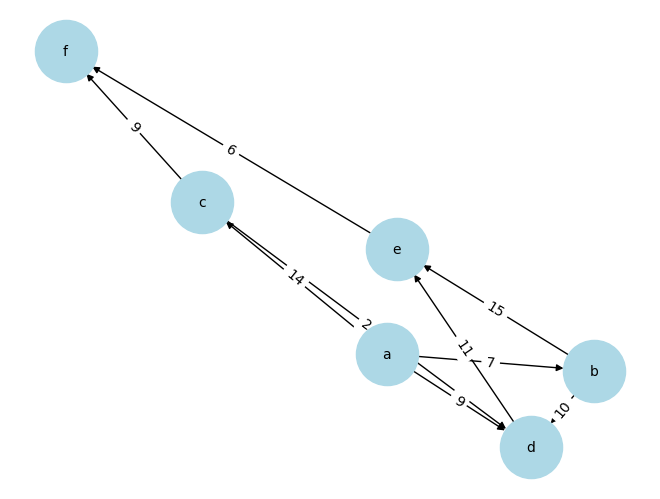

Graphe enregistré dans my_graph.png


In [18]:
import networkx as nx
import matplotlib.pyplot as plt


def to_networkx(graph, filename="graph.png"):
    """
    Génère un graphe visuel avec les poids sur les arêtes.
    """
    G = nx.DiGraph()

    # Ajout des arêtes
    for src, dests in graph.items():
        for dest, weight in dests.items():
            G.add_edge(src, dest, weight=weight)

    # Layout automatique
    pos = nx.spring_layout(G, seed=42)

    # Dessin du graphe
    nx.draw(
        G,
        pos,
        with_labels=True,
        node_size=2000,
        node_color="lightblue",
        font_size=10,
        arrows=True
    )

    # Poids sur les arêtes
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.savefig(filename)
    plt.show()
    print(f"Graphe enregistré dans {filename}")

to_networkx(G, "my_graph.png")